In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read the Data
df = pd.read_csv("training_log.csv")

In [3]:
#Check the Numbers
df.describe()

,Sets,Reps,Weight_kg,RPE,Soreness
count,12.0,12.000000,12.000000,12.000000,12.000000
mean,3.0,5.000000,27.500000,7.333333,6.166667
std,0.0,2.730301,8.048151,0.984732,1.898963
min,3.0,1.000000,17.500000,5.000000,4.000000
25%,3.0,2.500000,19.375000,7.000000,4.750000
50%,3.0,6.000000,30.000000,7.000000,6.000000
75%,3.0,7.000000,33.125000,8.000000,6.750000
max,3.0,8.000000,37.500000,9.000000,9.000000


In [45]:
#Pre Processing
df["Date"] = pd.to_datetime(df["Date"])
df["Volume"] = df["Sets"] * df["Reps"] * df["Weight_kg"]

In [ ]:
#Sorting By Date
df = df.sort_values(by="Date")

In [42]:
df.head(5)

,Date,Arm,Exercise,Sets,Reps,Weight_kg,RPE,Soreness
0,2026-01-01,R,Wrist Wrench,3,8,32.5,8,6
1,2026-01-01,R,Finger Containment,3,1,17.5,8,5
2,2026-01-01,R,Index Knuckle Pronation,3,7,20.0,7,4
3,2026-01-01,R,Cupping,3,7,17.5,7,4
4,2026-01-03,R,Back Pressure,3,1,27.5,7,6


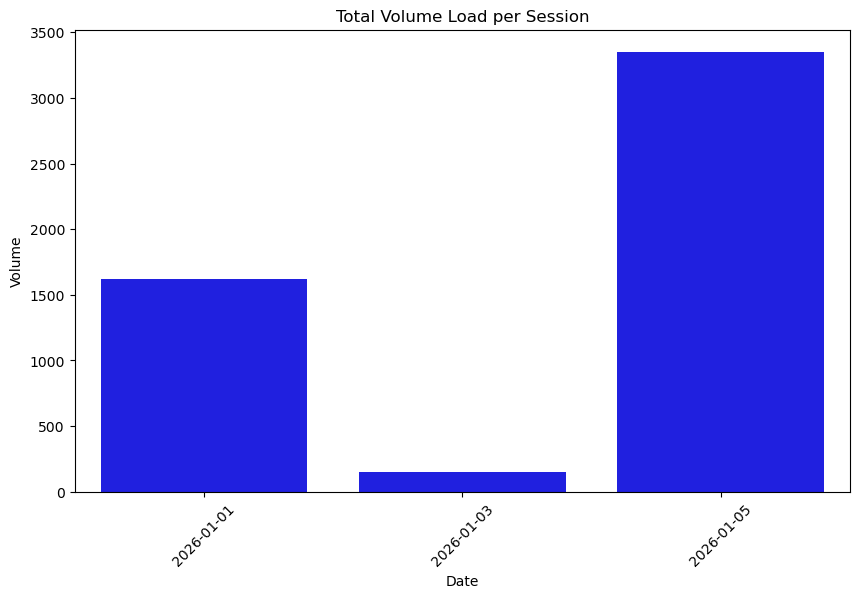

In [ ]:
#Check Volumer for each Session
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Date", y="Volume", estimator="sum", errorbar=None, color="Blue")
plt.title("Total Volume Load per Session")
plt.xticks(rotation=45) # Tilts the dates so they fit
plt.show()

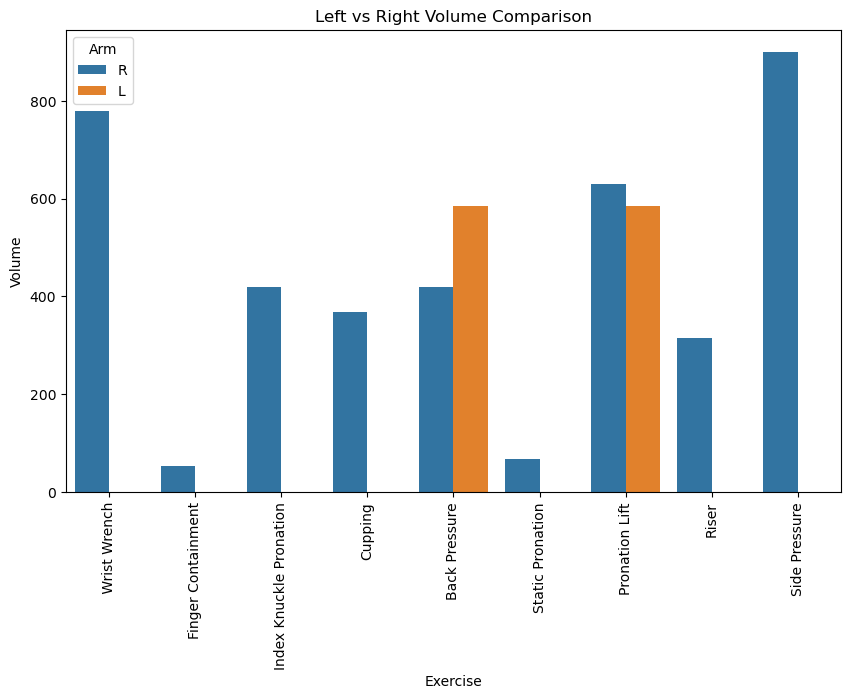

In [ ]:
#Comparing Volume of  left and Right Arm
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Exercise", y="Volume", hue="Arm", estimator="sum", errorbar=None)
plt.title("Left vs Right Volume Comparison")
plt.xticks(rotation=90) 
plt.show()

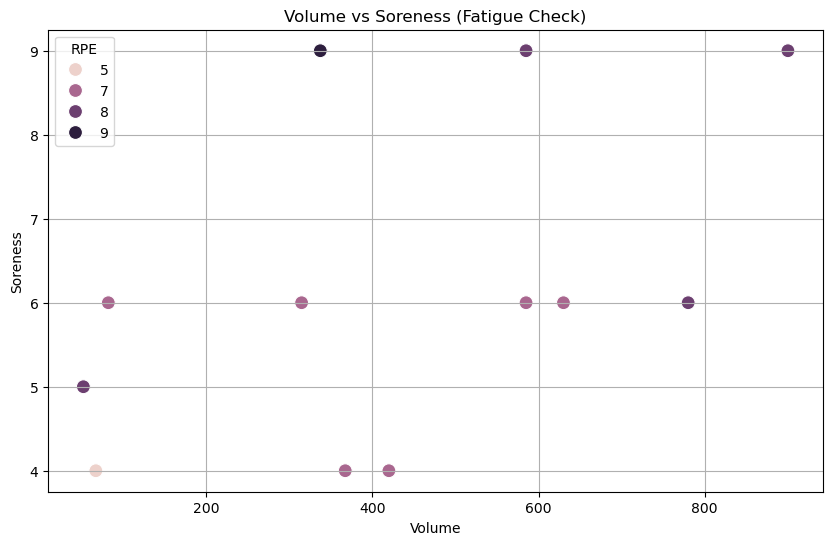

In [ ]:
#Soreness as Volume Grows
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Volume", y="Soreness", hue="RPE", s=100)
plt.title("Volume vs Soreness (Fatigue Check)")
plt.grid(True) 
plt.show()

In [ ]:
#Creating 1 rep max using formala (weight * 1 + reps/30)
df["e1RM"] = df["Weight_kg"] * (1 + df["Reps"] / 30)

In [ ]:
#Getting top 5 Lifts with Highest 1Rep Max
print(df[["Exercise", "Weight_kg", "Reps", "e1RM"]].sort_values(by="e1RM", ascending=False).head())

          Exercise  Weight_kg  Reps       e1RM
11   Side Pressure       37.5     8  47.500000
8   Pronation Lift       35.0     6  42.000000
6    Back Pressure       37.5     3  41.250000
0     Wrist Wrench       32.5     8  41.166667
7    Back Pressure       32.5     6  39.000000


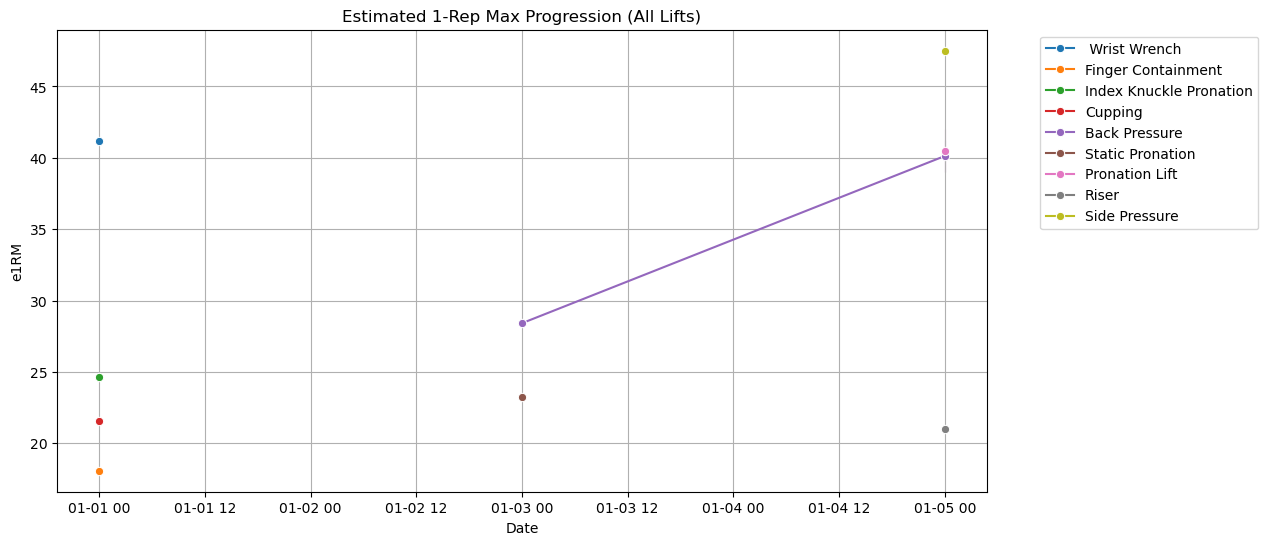

In [ ]:
#Checking growth from 1 Session to Another
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="e1RM", hue="Exercise", marker="o")
plt.title("Estimated 1-Rep Max Progression (All Lifts)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Moves the legend outside so it doesn't block the lines
plt.show()

In [36]:
target_exercise = "Back Pressure"
subset = df[df["Exercise"] == target_exercise]

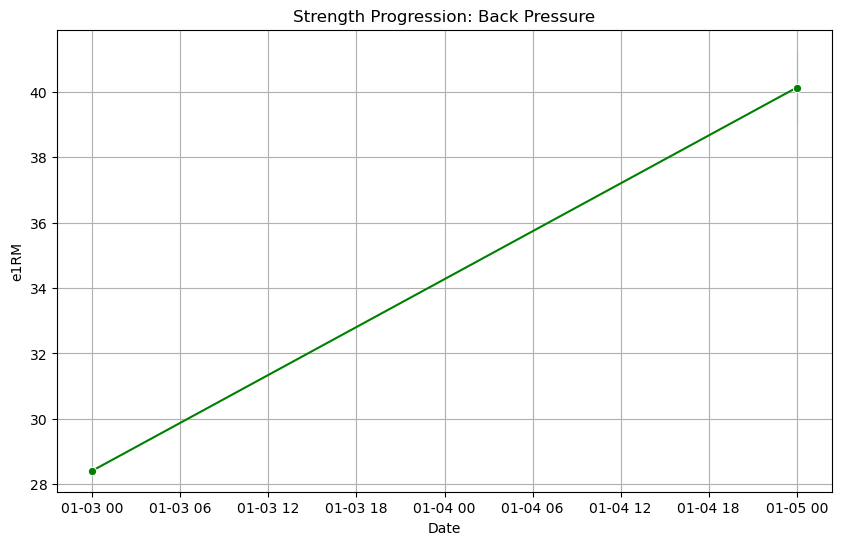

In [ ]:
#Checking Growth of Back Pressure
plt.figure(figsize=(10, 6))
sns.lineplot(data=subset, x="Date", y="e1RM", marker="o", color="green")
plt.title(f"Strength Progression: {target_exercise}")
plt.grid(True)
plt.show()

INSIGHT 

1-We See as Volume grows the Soreness or fatique does not grow in this case, suggesting increse in volume does not always mean increase in soreness. ---> Volume and Soreness show a weak correlation. High-volume sessions did not consistently lead to high fatigue, suggesting that Intensity (RPE) or Exercise Selection (e.g., Side Pressure vs. Wrist Curls) may be the primary drivers of soreness, not just total reps."


2-Volume of left Arm is mostly less except in case of Back Pressure.---> The Left Arm lags behind the Right Arm in total volume across all exercises, with the notable exception of Back Pressure, where the Left Arm matched or exceeded the Right. This suggests a specific strength asymmetry in the wrist/hand, while the back pressure chain remains balanced."


3-Highest Volume was seen on 2026-01-05 with 3500. ---> "A significant volume spike occurred on Jan 5th (3500kg), which is substantially higher than the weekly average. This session represents a peak load, likely requiring a longer recovery period or a deload in the following session."


4-Highest 1 Rep Max came out to be side Pressure.---> "Side Pressure yielded the highest estimated 1RM. However, it is critical to compare this against Pronation strength. A large gap (Side Pressure >> Pronation) may indicate a structural vulnerability where the arm's driving force exceeds its rotational safety limit."
